In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#fonction pour avoir un backfround de figure noir
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Dataset

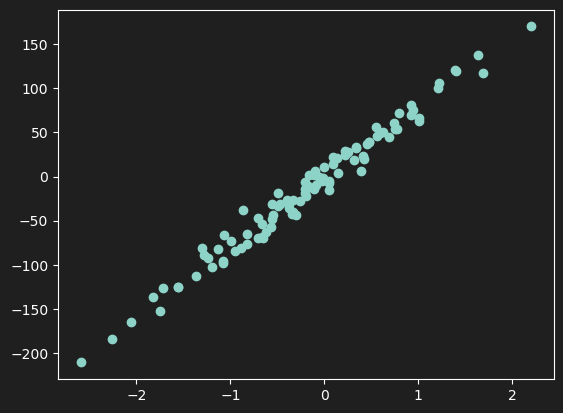

In [7]:
x,y = make_regression(n_samples=100, n_features=1, noise = 10)
plt.scatter(x,y)

In [9]:
print(x.shape)
# On reshape y car par défaut, y est de dim "100, ". Il faut donc preciser qu'il n'y a qu'une seule colonne.
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [11]:
# On creer notre matrice X avec la fonction hstack qui permet de "coller" deux vecteurs et ainsi de faire une matrice.
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [13]:
theta = np.random.randn(2,1)
theta.shape
theta

array([[ 1.45541274],
       [-0.44491196]])

# 2. Modèle

In [17]:
def model(X,theta):
    return X.dot(theta) # effectu le produit matricielle de X et theta.

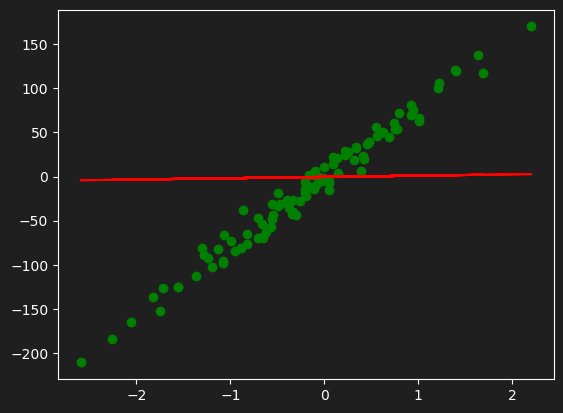

In [19]:
plt.scatter(x,y, c ='g')
plt.plot(x, model(X,theta), c = 'r') # On affiche notre modèle par rapport à notre dataset.

# 3. Fonction coût

In [22]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)- y)**2)

In [24]:
cost_function(X,y,theta) # rappel : on veut que le coût soit le plus proche de zero possible.

2516.4373742841753

# 4. Gradient et descente de gradient

In [27]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [29]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# 5. Resultat de la regression linéaire

In [32]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [34]:
theta_final

array([[79.12305634],
       [-0.31919473]])

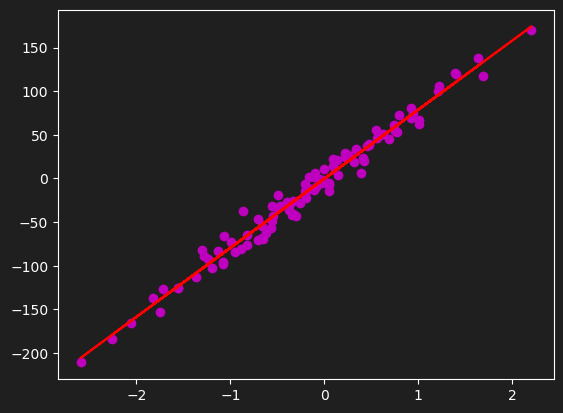

In [36]:
prediction = model(X, theta_final)
plt.scatter(x,y, c = 'm')
plt.plot(x, prediction, c = 'r')

### On remarque que le modèle n'est pas encore tres fiable. 
### Pour résoudre cela, soit on augmente le nombre d'itérations, soit on augmente le learning rate pour converger plus rapidement. Attention cependant à ne pas trop l'augmenter.

### On va regarder comment évolue notre model au fil des itération et ainsi savoir le nombre d'itération necessaire pour une valeur du learning_rate donnée.

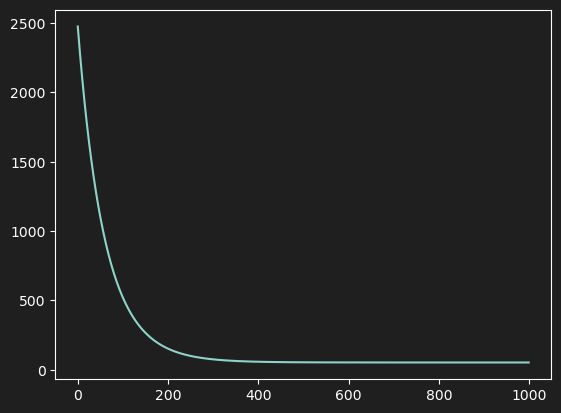

In [40]:
plt.plot(range(1000), cost_history)

### On regarde un indicateur appelé le coefficient de détermination, qui nous permet de savoir si notre modèle est fiable. C'est plus parlant que la fonction coût

In [47]:
def coef_determination(y, prediction):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [49]:
coef_determination(y, prediction)

0.9788826789794357

### notre coef est assez proche de 1 donc on à un bon model.